# Note to reader

This is V1.4 of the code for Part 2 of assignment 1 for QBUS2820

Changes include:

1. Removed some calculations (RSquared and RSS) in the best subset algorithm for cost
2. Calculated RMSE and made that our score rather than MSE
3. Imported test_csv
4. Imported maths module
5. Renamed a lot of variables with prefix Train_ so that we can use Test_ and Train_ distinctions

Note - Failed to implement an softcode feature whereby a generated dataframe would be able to tel automatically update the X variable used in the test error

Ie, X = RMSE_Dict

so that

X = ['AST']

X = ['AST', 'DEF']

X = ['AST', 'DEF', 'REF']

---------------

# Brief

Find the most appropriate predictive models of your choice to predict NBA player salary from performance statistics.

As a consultant working for a sports data analytics company, the NBA league approached you to develop predictive models to predict NBA salaries based on state-of-art techniques from predictive analytics. To enable this task, you were provided with a dataset containing highly detailed performance of the NBA players. The response is the SALARY($Millions) column in the dataset.

As part of the contract, you need to write a report according to the details below. The client will use a test set to evaluate your work, using RSME as the scoring metric

Your report must include the validation scores for at least five different sets of predictions, including your final 2 best models. You need to make a submission on Kaggle to get each validation score. You need to present your final 2 best models in details. For the other three additional methods, only brief explanations of the models are needed.

# Explanation of Acronym

Glossary very helpful https://stats.nba.com/help/glossary/

**PER** - Personal efficiency rating

**TS** - True shooting percentage

**ORB** - Offensive rebounds

**DRB** - Defensive rebounds

**TRB** - Total rebounds

**AST** - Assists

**STL** - Steals

**BLK** - Blocks

**TOV** - Turnover percentage (per possession)

**USG** - Usage percentage

**ORtg** - Offensive rating

**DRtg** - Defensive rating

**OWS** - Offensive win shares

**DWS** - Defensive win shares

**WS** - Win shares


----------------

# Table of Contents

1. Relevant Packages
2. Importing Data
3. Variable and lists
4. Data Cleaning
5. Exploratory Data Analysis

## Relevant Packages

In [1]:
#pandas used for importing data in a dataframe that can be examined
import pandas as pd

#numpy used for preforming various calculations with dataframes
import numpy as np

#random used for random number generation
import random as random

#time used to time calculations
import time as time

#maths used for some basic mathematical calculations
import math

#itertools used for better looping functions
import itertools

#statsmodels used for statistical models like OLS
import statsmodels.api as sm
import statsmodels.formula.api as smf

#sklearn modules used for regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#matplotlib and seaborn both used for graphing data
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
#read_csv is used for .csv
Raw_Train = pd.read_csv('p2_train.csv') 

Raw_Train.head(5) #note that the ... column is not shown for space saving reasons

,Train_ID,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,1,2.288205,SG,Orlando Magic,21,76,1503,10.3,0.533,2.4,...,11.6,1.1,0.3,14.3,19.7,101,111,0.6,0.8,1.4
1,2,2.139000,PG,Washington Wizards,29,52,1114,12.5,0.530,1.0,...,13.0,0.8,0.0,11.0,23.8,102,113,0.6,0.3,1.0
2,3,8.000000,SG,New York Knicks,28,73,2552,16.0,0.574,1.4,...,16.9,0.7,0.1,11.2,23.3,110,112,4.3,1.0,5.3
3,4,5.158539,SG,Memphis Grizzlies,32,55,1278,15.6,0.531,7.3,...,11.7,3.8,1.2,16.2,20.1,102,101,0.5,2.1,2.7
4,5,3.333333,PF,Atlanta Hawks,25,80,1482,15.3,0.559,4.9,...,8.9,1.0,0.4,10.3,23.5,105,108,1.3,1.2,2.6


In [3]:
Raw_Test = pd.read_csv('p2_test.csv')

Raw_Test.head(5)

,Id,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,DRB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,1,SG,Utah Jazz,22,78,2193,15.8,0.547,3.0,10.7,...,16.9,1.7,0.5,13.0,23.9,106,113,2.6,0.6,3.2
1,2,PG,Phoenix Suns,22,75,1132,8.8,0.390,1.9,8.8,...,30.8,3.1,0.3,24.2,14.1,89,107,-1.0,1.1,0.1
2,3,SF,Chicago Bulls,22,77,1231,8.0,0.489,1.8,9.6,...,9.1,1.3,0.9,11.1,14.9,97,104,-0.1,1.7,1.6
3,4,C,Utah Jazz,23,58,684,15.2,0.590,8.2,17.4,...,5.6,1.1,6.1,11.0,12.0,122,108,1.2,0.6,1.8
4,5,PF,Golden State Warriors,27,82,2007,11.1,0.523,8.5,21.3,...,4.1,0.8,2.3,14.5,14.4,103,108,0.9,1.7,2.7


## Data Cleaning

In [4]:
#creating dummmy variables for TEAM and POSITION
DumTEAM_Train = pd.get_dummies(Raw_Train.TEAM, prefix= 'Dum')
DumPOS_Train = pd.get_dummies(Raw_Train.POSITION, prefix= 'Dum')

Temp_Train_1 = pd.merge(Raw_Train, DumPOS_Train, on= Raw_Train['Train_ID'])
Temp_Train_2 = pd.merge(Raw_Train, DumTEAM_Train, on= Raw_Train['Train_ID'])

Temp_Train = Temp_Train_2

Temp_Train.head(5)

,key_0,Train_ID,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,...,Dum_Oklahoma City Thunder,Dum_Orlando Magic,Dum_Philadelphia 76ers,Dum_Phoenix Suns,Dum_Portland Trail Blazers,Dum_Sacramento Kings,Dum_San Antonio Spurs,Dum_Toronto Raptors,Dum_Utah Jazz,Dum_Washington Wizards
0,1,1,2.288205,SG,Orlando Magic,21,76,1503,10.3,0.533,...,0,1,0,0,0,0,0,0,0,0
1,2,2,2.139000,PG,Washington Wizards,29,52,1114,12.5,0.530,...,0,0,0,0,0,0,0,0,0,1
2,3,3,8.000000,SG,New York Knicks,28,73,2552,16.0,0.574,...,0,0,0,0,0,0,0,0,0,0
3,4,4,5.158539,SG,Memphis Grizzlies,32,55,1278,15.6,0.531,...,0,0,0,0,0,0,0,0,0,0
4,5,5,3.333333,PF,Atlanta Hawks,25,80,1482,15.3,0.559,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#checking for empty cells
if Temp_Train.empty:
    print('DataFrame is empty!')
else:
    print('Good to go!')

Good to go!


In [6]:
#checking for NaN values
if Temp_Train.isnull().any().any():
    NaN_Sum = Raw_Train.isnull().sum().sum() 
    print('Dataframe has NaN values:', NaN_Sum)
else:
    print('Good to go!')

Good to go!


In [7]:
#checking for empty cells
if Raw_Test.empty:
    print('DataFrame is empty!')
else:
    print('Good to go!')

Good to go!


In [8]:
#checking for NaN values
if Raw_Test.isnull().any().any():
    NaN_Sum = Raw_Train.isnull().sum().sum() 
    print('Dataframe has NaN values:', NaN_Sum)
else:
    print('Good to go!')

Good to go!


### Notes

There are no empty or incorrect observations/cells so we can begin with our EDA. Data cleaning is not necessary as the data seems to be of acceptable quality


Moreover, no changes to the names or values of observations were made

In [9]:
Train = Raw_Train

In [10]:
Test = Raw_Test

## Variables and List

Created some variables and list to prepare for subsequent coding. Probably not best method to place it here but meh. Open to suggestions

In [11]:
#use this list for big functions
Allvariables = [
    'SALARY',
    'POSITION',
    'TEAM',
    'Age',
    'Games',
    'Minutes',
    'PER',
    'TS',
    'ORB',
    'DRB',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'USG',
    'ORtg',
    'DRtg',
    'OWS',
    'DWS',
    'WS',
]

#Is all variables except salary and categorical variables
Allintegervar = [
    'Age',
    'Games',
    'Minutes',
    'PER',
    'TS',
    'ORB',
    'DRB',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'USG',
    'ORtg',
    'DRtg',
    'OWS',
    'DWS',
    'WS',    
]

## Exploratory Data Analysis

Need to make sure our data is acceptable for OLS regression and KNN. We are testing for the 5+1 assumptions in OLS

1. Regression model is linear in parameters
There should be no non-linear variables. We only have integer or % values. 

2. Random sampling of observations, (iid)
We can assume yes as the data was given to us and it appears to be randomly taken from basketball teams

3. Homoscedastic residuals or equal variance of residuals
Use a plot of residuals to check when model is made

4. Conditional mean of error terms is 0
No relationship between error and X

5. No multi-collinearity
Need to be careful of overall rating = defensive + offensive rating

6. Error terms are normally distributed
Use a plot of errors to check when model is made

### Scatterplot Matrix

Download the image to see it properly. Check the discord for the jpeg format because you may open the png copy which removes the white background

In [12]:
#Scatterplot_Matrix_1 = sns.pairplot(Train[Allintegervar ], 
#                                    kind= 'reg', 
#                                    plot_kws = {'scatter_kws' :{'color': sns.color_palette('Blues')[-1],
#                                    'alpha': 0.4}})

#plt.tight_layout()
#plt.show()

### Graphs for the response variable (SALARY)

The boxplot shows an alright distribution for salary. We expect to have some high salary for star players. Furthermore, the pattern plot shows no obvious pattern so we can say no other variable is affecting salary.

If we do create a OLS model, we could use a log model to nullify the outliers

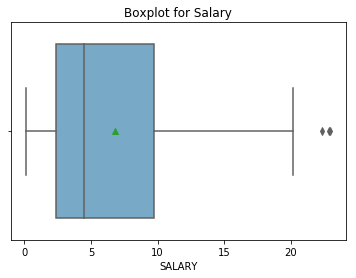

In [13]:
#boxplot
Boxplot_Salary = sns.boxplot(x= Train['SALARY'], data= Train, palette='Blues', showmeans=True)

plt.title('Boxplot for Salary')

plt.show()

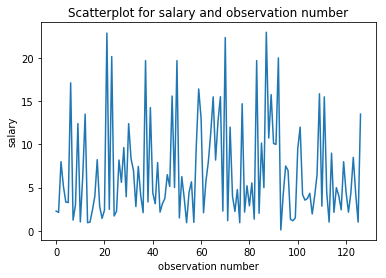

In [14]:
#patternplot
Train['SALARY'].plot()

plt.title('Scatterplot for salary and observation number')
plt.xlabel('observation number')
plt.ylabel('salary')

plt.show()

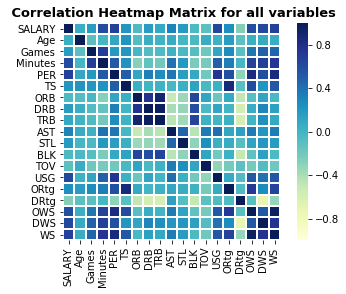

In [15]:
Heatmap_Matrix_1 = sns.heatmap(Train[Allvariables].corr(), 
            vmax= 1, 
            vmin= -1, 
            center= 0,
            square= True,
            linewidths=1,
            annot= False,
            #ax= Heatmap_Matrix_1,
            cmap= 'YlGnBu')

Heatmap_Matrix_1.set_title(' Correlation Heatmap Matrix for all variables', fontweight= 'bold', fontsize= 13)

plt.show()

## Exploratory Data Analysis for Dummies

Wrote a seperate part here to check dummies.

In short, there aren't enough values in the dummies for adequate analysis. Need to clean this bit up with for loops and other pandas functions: https://stackoverflow.com/questions/46431243/pandas-dataframe-groupby-how-to-get-sum-of-multiple-columns

In [16]:
DumTEAM_Train.head(5)

,Dum_Atlanta Hawks,Dum_Boston Celtics,Dum_Brooklyn Nets,Dum_Charlotte Hornets,Dum_Chicago Bulls,Dum_Cleveland Cavaliers,Dum_Dallas Mavericks,Dum_Denver Nuggets,Dum_Detroit Pistons,Dum_Golden State Warriors,...,Dum_Oklahoma City Thunder,Dum_Orlando Magic,Dum_Philadelphia 76ers,Dum_Phoenix Suns,Dum_Portland Trail Blazers,Dum_Sacramento Kings,Dum_San Antonio Spurs,Dum_Toronto Raptors,Dum_Utah Jazz,Dum_Washington Wizards
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
DumPOS_Train.head(5)

,Dum_C,Dum_PF,Dum_PG,Dum_SF,Dum_SG
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0


In [18]:
#creating some lists and variables for the bar charts
Dum_Team = ('Oklahoma', 'Orlando', 'Philadelphia', 
            'Phoenix', 'Portland', 'Sacramento', 
            'San Antonio', 'Toronto', 'Utah', 'Washington')
Dum_Team_Sum = (Temp_Train['Dum_Oklahoma City Thunder'].sum(), 
                Temp_Train['Dum_Orlando Magic'].sum(),
                Temp_Train['Dum_Philadelphia 76ers'].sum(),
                Temp_Train['Dum_Phoenix Suns'].sum(),
                Temp_Train['Dum_Portland Trail Blazers'].sum(),
                Temp_Train['Dum_Sacramento Kings'].sum(),
                Temp_Train['Dum_San Antonio Spurs'].sum(),
                Temp_Train['Dum_Toronto Raptors'].sum(),
                Temp_Train['Dum_Utah Jazz'].sum(),
                Temp_Train['Dum_Washington Wizards'].sum())
Dum_Team_Ypos = np.arange(len(Dum_Team_Sum))

Dum_Pos = ('')

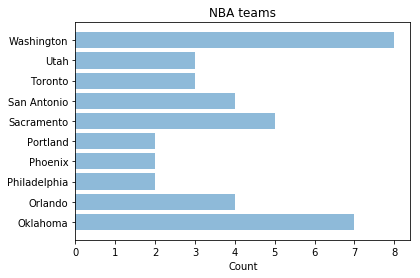

In [19]:
#Bar chart for team count
plt.barh(Dum_Team_Ypos, Dum_Team_Sum, align= 'center', alpha= 0.5 )
plt.yticks(Dum_Team_Ypos, Dum_Team)
plt.xlabel('Count')
plt.title('NBA teams')
 
plt.show()

In [20]:
Dum_Pos_Sum = (DumPOS_Train['Dum_C'].sum(),
               DumPOS_Train['Dum_PF'].sum(),
               DumPOS_Train['Dum_PG'].sum(),
               DumPOS_Train['Dum_SF'].sum(),
               DumPOS_Train['Dum_SG'].sum())
Dum_Pos_Sum

(23, 28, 26, 20, 30)

## Model Selection

Created my own function using the help of these links: (have to check up on if we're plagarising)

http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html

https://xavierbourretsicotte.github.io/subset_selection.html

https://www.youtube.com/watch?v=Wb2Tp35dZ-I

In [21]:
#function used to create a linear regression model
#calculates an OLS model and subsequently, MSE, RSS and Rsquared
def Temp_OLS(X, Y):
    Trainmodel = linear_model.LinearRegression(fit_intercept= True)
    Trainmodel.fit(X, Y)
    MSE = mean_squared_error(Y, Trainmodel.predict(X))
    RMSE = math.sqrt(mean_squared_error(Y, Trainmodel.predict(X)))

    return MSE, RMSE

In [22]:
#model selection algorithm 1
Y = Train['SALARY']
X = Train.drop(['Train_ID', 'SALARY', 'TEAM', 'POSITION'], axis= 1)

Train_MSE_List = []
Train_RMSE_List = []
Train_Feature_Number = []
Train_Feature_List = []

for Kilo in range(1, 6): #note max value of kilo (k) is 20 as no categorical predictors. Takes ~10m to caculate range (1,11)
    for combinations in itertools.combinations(X.columns, Kilo):
        Train_Result = Temp_OLS(X[list(combinations)], Y) #convert tuple to list
        Train_MSE_List.append(Train_Result[0])   
        Train_RMSE_List.append(Train_Result[1])
        Train_Feature_Number.append(len(combinations))    
        Train_Feature_List.append(combinations)
    
Bestsubset = pd.DataFrame({
    'Feature Number': Train_Feature_Number,
    'Features': Train_Feature_List,
    'MSE': Train_MSE_List,
    'RMSE': Train_RMSE_List,
})

Bestsubset.shape

(12615, 4)

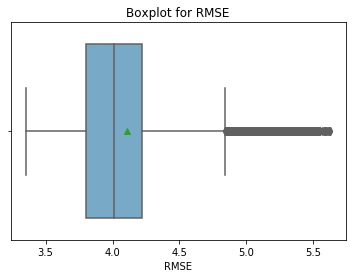

In [23]:
#boxplot
Boxplot_RMSE = sns.boxplot(x= Bestsubset['RMSE'], data= Bestsubset, palette= 'Blues', showmeans= True)

plt.title('Boxplot for RMSE')

plt.show()

In [24]:
#creating seperate dataframes for each feature number
Bestsubset_Temp = Bestsubset.groupby('Feature Number')

for keys, values in Bestsubset_Temp:
    print(keys)

1
2
3
4
5


In [25]:
#Finding minimum value in all Stepwise df
Bestsubset_Temp.min()

,Features,MSE,RMSE
Feature Number,,,
1,"(AST,)",17.335114,4.163546
2,"(AST, BLK)",14.228934,3.772126
3,"(AST, BLK, DRtg)",12.827446,3.581542
4,"(AST, BLK, DRtg, DWS)",11.619989,3.408810
5,"(AST, BLK, DRtg, DWS, WS)",11.237626,3.352257


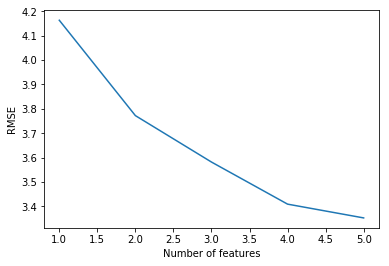

Lowest RMSE = 3.3522568480940014


In [26]:
#creating half of the learning curve plotting test error
Bestsubset_RMSE = Bestsubset.groupby('Feature Number', as_index= False)['RMSE'].min()

fig, ax=plt.subplots()
ax.plot(Bestsubset_RMSE['Feature Number'], Bestsubset_RMSE['RMSE'], color= '#1F77B4')
ax.set_xlabel('Number of features')
ax.set_ylabel('RMSE')
plt.show()

print('Lowest RMSE = {}'.format(Bestsubset_RMSE['RMSE'].min()))

### Want so that our prediction will use the features in the MinRMSE dataframe, along with the test data to calculate test error

https://machinelearningmastery.com/make-predictions-scikit-learn/

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [134]:
#df of all min RMSE values for each feature number
MinRMSE = Bestsubset_Temp.min()

#for some reason 'Feature Number' isn't indexed in df so making a new column to reference off
Temp_DF_1 = MinRMSE.drop(['MSE', 'RMSE'], axis= 1)
Temp_DF_1.insert(0, 'ID', range(0, + len(Temp_DF_1))) 

In [135]:
#creatinga  dictionary for looping
MinRMSE_Dict = Temp_DF_1.set_index('ID')['Features'].to_dict()
MinRMSE_Dict

{0: ('AST',),
 1: ('AST', 'BLK'),
 2: ('AST', 'BLK', 'DRtg'),
 3: ('AST', 'BLK', 'DRtg', 'DWS'),
 4: ('AST', 'BLK', 'DRtg', 'DWS', 'WS')}

In [136]:
for keys, values in MinRMSE_Dict.items():
    print(values)

('AST',)
('AST', 'BLK')
('AST', 'BLK', 'DRtg')
('AST', 'BLK', 'DRtg', 'DWS')
('AST', 'BLK', 'DRtg', 'DWS', 'WS')


In [166]:
Remo = Train[MinRMSE_Dict.values] #references all values in the MinRMSE dictionary

TypeError: values() takes no arguments (1 given)

In [172]:
#used df.values to create an array
Temp_DF_2 = MinRMSE.drop(['MSE', 'RMSE'], axis= 1)
Features_RMSE = Temp_DF_2.values
Features_RMSE


array([[('AST',)],
       [('AST', 'BLK')],
       [('AST', 'BLK', 'DRtg')],
       [('AST', 'BLK', 'DRtg', 'DWS')],
       [('AST', 'BLK', 'DRtg', 'DWS', 'WS')]], dtype=object)

In [167]:
Train[Features_RMSE]

KeyError: "[(('AST',),) (('AST', 'BLK'),) (('AST', 'BLK', 'DRtg'),)\n (('AST', 'BLK', 'DRtg', 'DWS'),) (('AST', 'BLK', 'DRtg', 'DWS', 'WS'),)] not in index"

In [141]:
#Jasmine code

predictors = ['something', 'something']
knn = KNeighborsRegressor(n_neighbors= 4, metric= 'mahalanobis'.....etc)
knn.fit(train[predictors], train['SALARY'])

predictions = knn.predict(test[predictors])

df = pd.DataFrame(predictions)

test = #here
#df.to_csv('something.csv')

SyntaxError: invalid syntax (<ipython-input-141-0f5abc1e331a>, line 4)

In [156]:
#function used to create a linear regression model
#calculates an OLS model and subsequently, MSE, RSS and Rsquared
def Test_OLS(X, Y):
    Testmodel = linear_model.LinearRegression(fit_intercept= True)
    Testmodel.fit(X, Y)
    MSE = mean_squared_error(Y, Testmodel.predict(X))
    RMSE = math.sqrt(mean_squared_error(Y, Testmodel.predict(X)))
    Prediction = Testmodel.predict(test[Features_RMSE])  #value to change

    return MSE, RMSE, Prediction

In [158]:
#model selection algorithm 2
Y = Train['SALARY']
X = Train[Features_RMSE] #references all values in the MinRMSE dictionary

Test_MSE_List = []
Test_RMSE_List = []
Test_Feature_Number = []
Test_Feature_List = []

Temp_Result = Test_OLS(X[list(combinations)], Y) #convert tuple to list
MSE_List.append(Temp_Result[0])   
RMSE_List.append(Temp_Result[1])
Feature_Number.append(len(combinations))    
Feature_List.append(combinations)
    
Testerror = pd.DataFrame({
    'Feature Number': Feature_Number,
    'Features': Feature_List,
    'MSE': MSE_List,
    'RMSE': RMSE_List,
})

Testerror.head(5)

KeyError: "[(('AST',),) (('AST', 'BLK'),) (('AST', 'BLK', 'DRtg'),)\n (('AST', 'BLK', 'DRtg', 'DWS'),) (('AST', 'BLK', 'DRtg', 'DWS', 'WS'),)] not in index"

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

trainingData = np.array([ [2.3,4.3,2.5], [1.3,5.2,5.2], [3.3,2.9,0.8], [3.1,4.3,4.0]  ])
trainingScores = np.array([3.4,7.5,4.5,1.6])

clf = LinearRegression(fit_intercept=True)
clf.fit(trainingData,trainingScores)

predictionData = np.array([ [2.5,2.4,2.7], [2.7,3.2,1.2] ])
clf.predict(predictionData)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

neighbours=np.arange(1, 101)
test_rmse = []
for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors = k) 
    knn.fit(train[['Limit']], train['Balance'])
    predictions = knn.predict(test[['Limit']])
    rmse = np.sqrt(mean_squared_error(test['Balance'], predictions))
    test_rmse.append(rmse)

fig, ax= plt.subplots()
ax.plot(neighbours, test_rmse, color='#1F77B4')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.show()

print('Lowest test error: K = {}'.format(1 + np.argmin(test_rmse)))

## Old Code and stuff

In [ ]:
for keys, values in Bestsubset_Temp:
    DF_MSE.append(values.min())
    DF_RMSE.append(values.min())
    print(values)
    

In [ ]:
for keys, values in Bestsubset_Temp:
    DF_MSE.append(values.min())
    DF_RMSE.append(values.min())
    
MinRMSE = pd.DataFrame({
    'MSE': DF_MSE,
    'RMSE': DF_RMSE
})

MinRMSE

In [ ]:
DF_MSE = []
DF_RMSE = []

for keys, values in Bestsubset_Temp:
    DF_MSE.append(values.min())
    DF_RMSE.append(values.min())

DF_RMSE

In [ ]:
MinRMSE = pd.DataFrame({
    'MSE': DF_MSE,
    'RMSE': DF_RMSE
})

MinRMSE

In [86]:
print(Temp_DF_1.columns.tolist())

#Temp_DF_1.set_index('Feature Number')['Features'].to_dict()

['Features']


In [87]:
print(MinRMSE.columns.tolist())

['Features', 'MSE', 'RMSE']
